In [1]:
!pip install gdown

!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 57.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 71.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 4.2.4
    Uninstalling cachetools-4.2.4:
      Successfully uninstalled cachetools-4.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.3 requires cubinlinker, which is not installed.
cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires ptxcompiler, 

In [2]:
import tensorflow as tf

from tensorflow.keras.callbacks import TensorBoard

from tensorboard.plugins.hparams import api as hp

import mlflow

from tensorflow.keras.applications import ResNet50

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

from tensorflow.keras import Sequential

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from functools import partial

import matplotlib.pyplot as plt

import albumentations as A

import numpy as np

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [8]:
!gdown 1--m8IGrdaNgf1ocUXBqJjnHBo3ZaxN0E

#!unzip /content/dataset.zip -d /content/dataset && rm /content/dataset.zip

!unzip /kaggle/working/dataset.zip -d /kaggle/working/dataset && rm /kaggle/working/dataset.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Downloading...
From (original): https://drive.google.com/uc?id=1--m8IGrdaNgf1ocUXBqJjnHBo3ZaxN0E
From (redirected): https://drive.google.com/uc?id=1--m8IGrdaNgf1ocUXBqJjnHBo3ZaxN0E&confirm=t&uuid=22d450c5-6d08-4eae-b88b-915b301007df
To: /kaggle/working/dataset.zip
100%|████████████████████████████████████████| 240M/240M [00:04<00:00, 56.8MB/s]
Archive:  /kaggle/working/dataset.zip
   creating: /kaggle/working/dataset/American coot/
   creating: /kaggle/working/dataset/Cheops/
   creating: /kaggle/working/dataset/Moorish arch/
   creating: /kaggle/working/dataset/Pharaoh/
   creating: /kaggle/working/dataset/alcoholic/
   creating: /kaggle/working/dataset/book bag/
   creating: /kaggle/working/dataset/chime/
   creating: /kaggle/working/dataset/cirque/
   creating: /kaggle/working/dataset/great grandparent/
   creating: /kaggle/working/dataset/hill myna/
   creating: /kaggle/working/dataset/kitchenware/
   creating: /kaggle/working/dataset/larva/
   creating: /kaggle/working/dataset/mas

In [ ]:
!gdown 1--m8IGrdaNgf1ocUXBqJjnHBo3ZaxN0E

#!unzip /content/dataset.zip -d /content/dataset && rm /content/dataset.zip

!unzip /kaggle/working/dataset.zip -d /kaggle/working/dataset && rm /kaggle/working/dataset.zip

In [9]:
from tensorflow.keras.preprocessing import image_dataset_from_directory



data_dir =  "/kaggle/working/dataset" # "/content/dataset"

train_ds_, val_ds_ = image_dataset_from_directory(

    data_dir,

    labels='inferred',

    label_mode='int',

    class_names=None,

    color_mode='rgb',

    batch_size=32,

    image_size=(500, 500),

    shuffle=True,

    seed=37,

    validation_split=0.2,

    subset='both',

    interpolation='bilinear',

)

Found 4000 files belonging to 20 classes.
Using 3200 files for training.
Using 800 files for validation.


In [11]:
def views_images_batch(dataset):

    fig, axes = plt.subplots(3,3, figsize = (6,6))

    for images, labels in dataset.take(1):  # Take 1 batch from the dataset

        for i in range(len(images)):

            img = images[i]

            label = labels[i]

            img_array = img.numpy()

            img_array = img_array.astype("uint8")

            if i < 9:

                axes[i//3][i%3].imshow(img_array)



    plt.show()

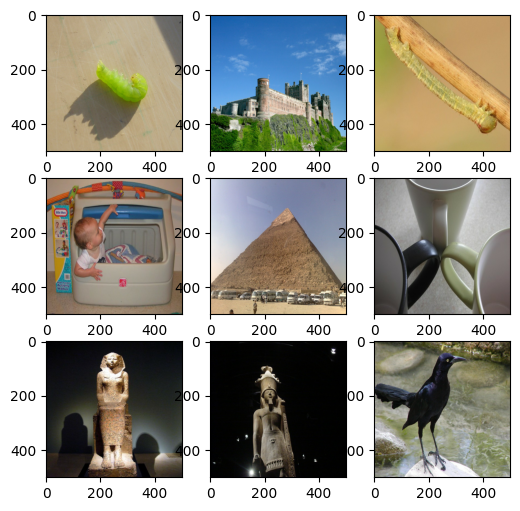

In [12]:
views_images_batch(train_ds_)

In [15]:
from tensorflow.keras.applications.resnet50 import preprocess_input



train_ds = train_ds_.map(lambda x, y: (preprocess_input(x), y))

val_ds = val_ds_.map(lambda x, y: (preprocess_input(x), y))

In [16]:
pipelines = {

    "PPL_1": A.Compose([

        A.HorizontalFlip(p=0.5),

        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.6),

        A.Rotate(limit=20, p=0.4),

        A.GaussNoise(var_limit=20, p=0.8),  # Light Gaussian noise

    ]),



    "PPL_2": A.Compose([

        A.HorizontalFlip(p=0.5),

        A.VerticalFlip(p=0.3),

        A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),

        A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.8),  # Light color jitter

    ]),



    "PPL_3": A.Compose([

        A.HorizontalFlip(p=0.5),

        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.3),

        A.Blur(blur_limit=3, p=0.2),  # Mild blur to mimic slight defocus

    ]),



    "PPL_4": A.Compose([

        A.Rotate(limit=15, p=0.4),

        A.HorizontalFlip(p=0.7),

        A.CoarseDropout(max_holes=100, max_height=10, max_width=10, p=0.7),  # Minor occlusion

    ]),



    "PPL_5": A.Compose([

        A.HorizontalFlip(p=0.5),

        A.RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=0.4),

        A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.3),  # Gentle color adjustment

        A.Resize(224, 224, p=1),

    ])

}


In [17]:
from PIL import Image

def augment(image, pipeline):

    image = image.numpy().astype("uint8")

    image = Image.fromarray(image)

    image = np.array(image)

    augmented = pipeline(image=image)['image']

    augmented = np.expand_dims(augmented, axis=0)

    return augmented[0]

In [18]:
import cv2

def revertChannels(image):

    image = image.astype("uint8")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

toy box


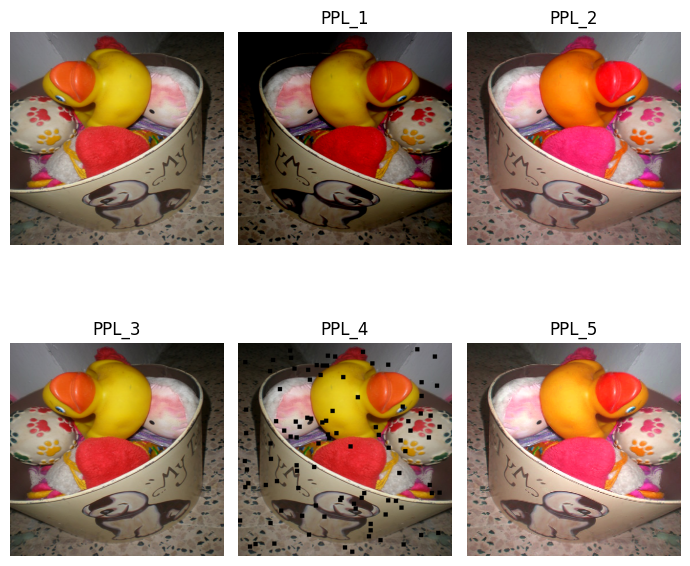

In [19]:
sample_image, sample_label = next(iter(train_ds_))

sample_image = sample_image[0]

sample_label = sample_label[0]



plt.figure(figsize=(7, 7))

plt.subplot(2, 3, 1)

print(train_ds_.class_names[sample_label])

plt.imshow(sample_image.numpy().astype("uint8"))

index = np.argmax(sample_label)

plt.axis("off")



for i, (name, pipeline) in enumerate(pipelines.items()):

    augmented_image = augment(sample_image, pipeline)

    plt.subplot(2, 3, i + 2)

    plt.imshow(augmented_image.astype("uint8"))



    plt.title(name)

    plt.axis("off")



plt.tight_layout()

plt.show()

In [20]:
def augmented_datagen(dataset, augmentations, batch_size, steps_per_epoch):

    while True:

        for images, labels in dataset.take(steps_per_epoch):

            if images.shape[0] == 0:

                continue

            augmented_images = [augmentations(image=img.numpy())['image'] for img in images]

            yield np.array(augmented_images ), labels.numpy()

## **Carga del Modelo Preentrenado con Imagenet y Grid Search**

In [21]:
# Descargar los parámetros de entrenamiento del Modelo

!gdown 1b3O7tJcZ9TQk4adXtfknFThAnesoVmvi

# !unzip grid_search_training.zip -d /content/grid_search_training && rm grid_search_training.zip

!unzip grid_search_training.zip -d /kaggle/working && rm grid_search_training.zip

Downloading...
From (original): https://drive.google.com/uc?id=1b3O7tJcZ9TQk4adXtfknFThAnesoVmvi
From (redirected): https://drive.google.com/uc?id=1b3O7tJcZ9TQk4adXtfknFThAnesoVmvi&confirm=t&uuid=bfb4f42b-8882-4168-98b6-5b68367829ea
To: /kaggle/working/grid_search_training.zip
100%|██████████████████████████████████████| 96.1M/96.1M [00:01<00:00, 82.7MB/s]
Archive:  grid_search_training.zip
  inflating: /kaggle/working/best_weights.keras  
  inflating: /kaggle/working/logs/hparam_tuning/events.out.tfevents.1730740903.7ffe8b21f9c6.23.0.v2  
  inflating: /kaggle/working/logs/hparam_tuning/run-1/events.out.tfevents.1730740903.7ffe8b21f9c6.23.1.v2  
  inflating: /kaggle/working/logs/hparam_tuning/run-1/train/events.out.tfevents.1730740905.7ffe8b21f9c6.23.2.v2  
  inflating: /kaggle/working/logs/hparam_tuning/run-1/validation/events.out.tfevents.1730740939.7ffe8b21f9c6.23.3.v2  
  inflating: /kaggle/working/logs/hparam_tuning/run-10/events.out.tfevents.1730745519.7ffe8b21f9c6.23.28.v2  
  i

In [22]:
# Descargar los parámetros de entrenamiento del Modelo

!gdown 1b3O7tJcZ9TQk4adXtfknFThAnesoVmvi

# !unzip grid_search_training.zip -d /content/grid_search_training && rm grid_search_training.zip

!unzip grid_search_training.zip -d /kaggle/working && rm grid_search_training.zip

Downloading...
From (original): https://drive.google.com/uc?id=1b3O7tJcZ9TQk4adXtfknFThAnesoVmvi
From (redirected): https://drive.google.com/uc?id=1b3O7tJcZ9TQk4adXtfknFThAnesoVmvi&confirm=t&uuid=2d4564ad-ca5c-4c16-b898-85af2f76a4e4
To: /kaggle/working/grid_search_training.zip
100%|███████████████████████████████████████| 96.1M/96.1M [00:00<00:00, 117MB/s]
Archive:  grid_search_training.zip
replace /kaggle/working/best_weights.keras? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras.applications import ResNet50

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

from tensorflow.keras import Sequential

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam



# Build the base model

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(500, 500, 3))

x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

x = Dropout(0.2)(x)

output_layer = Dense(20, activation='softmax')(x)



# Complete model

model = Model(inputs=base_model.input, outputs=output_layer)



# Freeze base model layers

for layer in base_model.layers:

    layer.trainable = False



# Compile model

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6)



# Use ".keras" file extension for model checkpoint in the new Keras format

checkpoint_filepath = "final_best_weights.keras"

model_checkpoint = ModelCheckpoint(checkpoint_filepath, save_best_only=True, monitor='val_accuracy')



callbacks = [early_stopping, reduce_lr, model_checkpoint]

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
from tensorflow.keras.models import load_model

model = load_model("/kaggle/working/best_weights.keras")



show_summary=True

if show_summary:

  model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 500, 500,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 506, 506,  │          0 │ input_layer_11[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 250, 250,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 250, 250,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 250, 250,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 252, 252,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 125, 125,  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 125, 125,  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 125, 125,  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 125, 125,  │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 125, 125,  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 125, 125,  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 125, 125,  │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 125, 125,  │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 125, 125,  │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 125, 125,  │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 125, 125,  │      1,024 │ conv2_block1_3_c

 Total params: 25,176,766 (96.04 MB)

 Trainable params: 529,684 (2.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,059,370 (4.04 MB)

In [27]:
def train(augmentation, model, train_ds, val_ds):

    steps_per_epoch = len(train_ds)

    validation_steps = len(val_ds)



    train_ds = train_ds.repeat()

    val_ds = val_ds.repeat()

    epochs = 20

    batch_size = 32



    history = model.fit(

        augmented_datagen(train_ds, augmentation, batch_size, steps_per_epoch),

        validation_data=val_ds,

        epochs=epochs,

        steps_per_epoch=steps_per_epoch,

        validation_steps=validation_steps,

    )



    return history

In [28]:
# Variable para guardar los mejores resultados

best_score = 0

best_pipeline = None



# Reiniciar el modelo antes de cada reentrenamiento

for ppl_name, pipeline in pipelines.items():

    print(f"Entrenando con {ppl_name}...")



    # Reiniciar el modelo

    model.load_weights('/kaggle/working/best_weights.keras')  # Cargar pesos del primer entrenamiento



    # Entrenar con el pipeline actual

    history = train(pipeline, model, train_ds, val_ds)



    # Evaluar el score

    val_accuracy = max(history.history['val_accuracy'])  # Mejor precisión de validación

    print(f"Mejor precisión de validación con {ppl_name}: {val_accuracy}")



    # Comparar y almacenar el mejor score

    if val_accuracy > best_score:

        best_score = val_accuracy

        best_pipeline = ppl_name



# Informar el mejor pipeline

print(f"\nEl mejor pipeline es '{best_pipeline}' con una precisión de validación de {best_score:.4f}.")

Entrenando con PPL_1...
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.1162 - loss: 3.4861 - val_accuracy: 0.9112 - val_loss: 0.5965
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1498 - loss: 2.8918 - val_accuracy: 0.9200 - val_loss: 0.5303
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1259 - loss: 2.9557 - val_accuracy: 0.9125 - val_loss: 0.4927
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1521 - loss: 2.8899 - val_accuracy: 0.9225 - val_loss: 0.4725
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1499 - loss: 2.8602 - val_accuracy: 0.9275 - val_loss: 0.4679
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1443 - loss: 2.8776 - val_accuracy: 0.9200 - val_loss: 0.4633
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1447 - loss: 2.8652 - val_accuracy: 0.9150 - val_loss: 0.4540
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.1528 -